# Table of Contents

1. [Introduction](#introduction)
2. [Data Overview](#data-overview)
   - 2.1. Number of Patients/Cases
   - 2.2. Number of Features
3. [Unique Feature Values](#unique-feature-values)
   - 3.1. Categorical Features
   - 3.2. Numerical Features
4. [Histograms of Numerical Feature Distributions](#histograms-of-numerical-feature-distributions)
5. [Correlations and Simple Dependencies](#correlations-and-simple-dependencies)
6. [Conclusions and Insights](#conclusions-and-insights)
7. [Analysis of Current Model Issues](#analysis-of-current-model-issues)
<br>

---

## Introduction

Dataset from : [Antimicrobial resistance data](https://www.kaggle.com/datasets/amritpal333/antimicrobial-resistance-data/code)

Based on the presented data, the task is to predict the sensitivity and resistance of major microorganism types to specific drugs.

<br>

## Data Overview

### Number of Patients/Cases




In [ ]:
import pandas as pd
from helpers.functions import read_excel_files, clean_and_filter_sheet, calculate_totals

# File paths
file_paths = [
    "AMR_datasets/E-coli, Tables 3-1 to 3-7.xlsx",
    "AMR_datasets/Klebsiella, Tables 3-8 to 3-13.xlsx",
    "AMR_datasets/Pseudomonas, Tables 3-14 to 3-20.xlsx",
    "AMR_datasets/Acinetobacter, Tables 3-21 to 3-25.xlsx",
    "AMR_datasets/Streptococcus, Tables 3-26 to 3-28.xlsx",
    "AMR_datasets/Staphylococcus, Table 3-29.xlsx",
    "AMR_datasets/Enterococci, Tables 3-30 and 3-31.xlsx",
]

grand_total_N = 0

# Read all Excel files
data = read_excel_files(file_paths)

# Iterate over files and sheets
for file_path, sheets in data.items():
    file_total_N = 0
    
    for sheet_name, df_sheet in sheets.items():
        filtered_df = clean_and_filter_sheet(df_sheet, file_path, sheet_name)
        if filtered_df is not None:
            # Calculate the total for columns N_2012 to N_2015
            for column in ['N_2012', 'N_2013', 'N_2014', 'N_2015']:
                if column in filtered_df.columns:
                    file_total_N += filtered_df[column].sum()

    print(f"Total N (tested isolates) for file '{file_path}': {file_total_N}")
    grand_total_N += file_total_N

print(f"Total N (tested isolates) in whole dataset: {grand_total_N}")


Total N (tested isolates) for file 'AMR_datasets/E-coli, Tables 3-1 to 3-7.xlsx': 1879550.2999999998
Total N (tested isolates) for file 'AMR_datasets/Klebsiella, Tables 3-8 to 3-13.xlsx': 382431
Total N (tested isolates) for file 'AMR_datasets/Pseudomonas, Tables 3-14 to 3-20.xlsx': 278819.4
Total N (tested isolates) for file 'AMR_datasets/Acinetobacter, Tables 3-21 to 3-25.xlsx': 65352.0
Total N (tested isolates) for file 'AMR_datasets/Streptococcus, Tables 3-26 to 3-28.xlsx': 135002.80000000002
Total N (tested isolates) for file 'AMR_datasets/Staphylococcus, Table 3-29.xlsx': 164239
Total N (tested isolates) for file 'AMR_datasets/Enterococci, Tables 3-30 and 3-31.xlsx': 72163.0
Total N (tested isolates) in whole dataset: 2977557.4999999995



### Number of Features

1. **Year**  
   - **Type**: Numerical  
   - **Description**: Year of the study or data collection.  

2. **Country**  
   - **Type**: Categorical  
   - **Description**: Country where the data was collected.  

3. **Microorganism**  
   - **Type**: Categorical  
   - **Description**: The type of microorganism.  

4. **Antimicrobial group**  
   - **Type**: Categorical  
   - **Description**: Group of antimicrobial drugs tested against the microorganism.  

5. **N (Total number of invasive isolates tested)**  
   - **Type**: Numerical  
   - **Description**: Total number of microorganism isolates tested for resistance to a specific antimicrobial group.  

6. **%R (Percentage resistance)**  
   - **Type**: Numerical  
   - **Description**: Percentage of microorganism isolates resistant to a specific antimicrobial group.  
   - **Target variable**: Numerical forecast indicator.

7. **95% CI (Confidence interval)**  
   - **Type**: Numerical range with spliting into lower and upper bounds.
   - **Description**: Confidence interval for the percentage resistance (%R), indicating the range of statistical uncertainty.  




## Unique Feature Values

### Categorical Features

Country : 30

    'Belgium' 'Finland' 'Sweden' 'Ireland' 'Denmark' 'Netherlands'
    'United Kingdom' 'Germany' 'Norway' 'Malta' 'France' 'Austria'
    'Czech Republic' 'Slovakia' 'Portugal' 'Slovenia' 'Spain' 'Hungary'
    'Latvia' 'Bulgaria' 'Italy' 'Romania' 'Cyprus' 'Poland' 'Croatia'
    'Lithuania' 'Greece' 'Estonia' 'Iceland' 'Luxembourg'

<br>

Microorganism : 7

    'Escherichia coli' 'Klebsiella pneumoniae' 'Pseudomonas aeruginosa'
    'Acinetobacter species' 'Streptococcus pneumoniae' 'Staphylococcus aureus' 'Enterococci'

<br>

Antimicrobical group : 13

    'Piperacillin+tazobactam' 'Ceftazidime' 'Fluoroquinolones' 'Aminoglycosides'
    'Carbapenems' 'Meticillin' 'Penicillin' 'Aminopenicillins' 'Gentamicin'
    'Macrolides' 'Vancomycin' 'Third-generation cephalosporins' 'Penicillins'




### Numerical Features

Year : 4

    '2012' '2013' '2014' '2015'

<br>

N : Finite

    'From 0 to +∞'

<br>

%R : Finite

    'From 0 to 100%'

<br>

95% CI : The size of the interval decreases as the amount of data increases.
    
    'From -∞ to +∞'


## Histograms of Numerical Feature Distributions

#### Tested isolates by year :



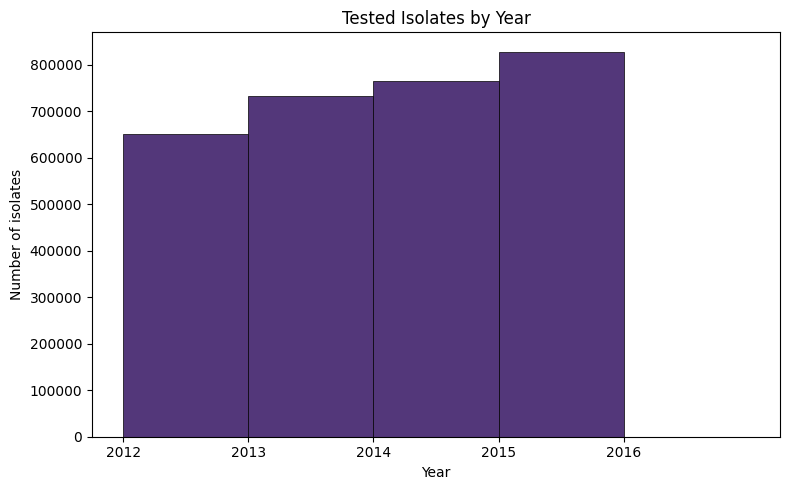

In [13]:
import pandas as pd
from helpers.functions import read_excel_files, clean_and_filter_sheet, calculate_totals, plot_totals

# File paths
file_paths = [
    "AMR_datasets/E-coli, Tables 3-1 to 3-7.xlsx",
    "AMR_datasets/Klebsiella, Tables 3-8 to 3-13.xlsx",
    "AMR_datasets/Pseudomonas, Tables 3-14 to 3-20.xlsx",
    "AMR_datasets/Acinetobacter, Tables 3-21 to 3-25.xlsx",
    "AMR_datasets/Streptococcus, Tables 3-26 to 3-28.xlsx",
    "AMR_datasets/Staphylococcus, Table 3-29.xlsx",
    "AMR_datasets/Enterococci, Tables 3-30 and 3-31.xlsx",
]

data = read_excel_files(file_paths)

# Initialize summary
total_summary = pd.Series(dtype=float)

# Process each file and sheet
for file_path, sheets in data.items():
    for sheet_name, df_sheet in sheets.items():
        filtered_df = clean_and_filter_sheet(df_sheet, file_path, sheet_name)
        if filtered_df is not None:
            sheet_totals = calculate_totals(filtered_df, ['N_2012', 'N_2013', 'N_2014', 'N_2015'])
            total_summary = total_summary.add(sheet_totals, fill_value=0)

# Prepare summary dataframe
total_summary = total_summary.reset_index()
total_summary.columns = ['Year', 'Total Patients']
total_summary['Year'] = total_summary['Year'].str.extract(r'(\d+)').astype(int)

# Add missing year 2016
if 2016 not in total_summary['Year'].values:
    total_summary = pd.concat(
        [total_summary, pd.DataFrame({'Year': [2016], 'Total Patients': [0]})],
        ignore_index=True
    )

total_summary = total_summary.sort_values(by='Year')

# Plot the results
plot_totals(total_summary)


#### Tested isolates by percentage of resistance :

In [ ]:
import pandas as pd
import numpy as np

file_paths = [
    "AMR_datasets/E-coli, Tables 3-1 to 3-7.xlsx",
    "AMR_datasets/Klebsiella, Tables 3-8 to 3-13.xlsx",
    "AMR_datasets/Pseudomonas, Tables 3-14 to 3-20.xlsx",
    "AMR_datasets/Acinetobacter, Tables 3-21 to 3-25.xlsx",
    "AMR_datasets/Streptococcus, Tables 3-26 to 3-28.xlsx",
    "AMR_datasets/Staphylococcus, Table 3-29.xlsx",
    "AMR_datasets/Enterococci, Tables 3-30 and 3-31.xlsx",
]



## Correlations and Simple Dependencies


## Conclusions and Insights



## Analysis of Current Model Issues

Unknown column "%bar", which wasn't integrated in model's logic.

"Less than 10 isolates reported, no percentage calculated" countries data wasn't included in total count of tested isolates.

A sheet reviewing the total number of isolates tested and the percentage of resistance to combinations of different antimicrobials were not included.

In counting the number of unique categorial features, countries with low amount of data was not included.

Penicillin and penicillins are different things?
